# PLATAFORMS MERGES

## General view & merge

In [4]:
import pandas as pd
import numpy as np
import re
import seaborn as sns # Importing the Seaborn library for advanced data visualization (as sns)
import matplotlib.pyplot as plt # Importing the Matplotlib library for basic plotting functionalities (as plt)

In [5]:
netflix = pd.read_csv("/Users/roraimachavez/Downloads/7.IRONHACK/Projects/data-wrangling-project/csv_plataforms/netflix.csv")
amazon = pd.read_csv("/Users/roraimachavez/Downloads/7.IRONHACK/Projects/data-wrangling-project/csv_plataforms/amazonprime.csv")

In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6568 entries, 0 to 6567
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          6568 non-null   int64 
 1   type                6568 non-null   object
 2   title               6568 non-null   object
 3   director            6568 non-null   object
 4   cast                6568 non-null   object
 5   country             6568 non-null   object
 6   release year        6568 non-null   int64 
 7   platform            6568 non-null   object
 8   animation           6568 non-null   int64 
 9   children & family   6568 non-null   int64 
 10  entertainment       6568 non-null   int64 
 11  documentary         6568 non-null   int64 
 12  thrillers           6568 non-null   int64 
 13  music & musicals    6568 non-null   int64 
 14  romance             6568 non-null   int64 
 15  comedy              6568 non-null   int64 
 16  drama               6568

In [7]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5808 entries, 0 to 5807
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          5808 non-null   int64 
 1   type                5808 non-null   object
 2   title               5808 non-null   object
 3   director            5808 non-null   object
 4   cast                5808 non-null   object
 5   country             5808 non-null   object
 6   release year        5808 non-null   int64 
 7   platform            5808 non-null   object
 8   drama               5808 non-null   int64 
 9   comedy              5808 non-null   int64 
 10  documentary         5808 non-null   int64 
 11  horror              5808 non-null   int64 
 12  thrillers           5808 non-null   int64 
 13  romance             5808 non-null   int64 
 14  children & family   5808 non-null   int64 
 15  entertainment       5808 non-null   int64 
 16  music & musicals    5808

In [8]:
df = pd.concat({'Netflix': netflix, 'Amazon': amazon})

In [9]:
df = df.drop(columns=['Unnamed: 0'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12376 entries, ('Netflix', 0) to ('Amazon', 5807)
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                12376 non-null  object
 1   title               12376 non-null  object
 2   director            12376 non-null  object
 3   cast                12376 non-null  object
 4   country             12376 non-null  object
 5   release year        12376 non-null  int64 
 6   platform            12376 non-null  object
 7   animation           12376 non-null  int64 
 8   children & family   12376 non-null  int64 
 9   entertainment       12376 non-null  int64 
 10  documentary         12376 non-null  int64 
 11  thrillers           12376 non-null  int64 
 12  music & musicals    12376 non-null  int64 
 13  romance             12376 non-null  int64 
 14  comedy              12376 non-null  int64 
 15  drama               12376 non-null  int64 
 16

## Visualization

In [11]:
df.head()

type                  title         director  \
Netflix 0    Movie   Dick Johnson Is Dead  Kirsten Johnson   
        1  TV Show          Blood & Water        not found   
        2  TV Show              Ganglands  Julien Leclercq   
        3  TV Show  Jailbirds New Orleans        not found   
        4  TV Show           Kota Factory        not found   

                                                        cast        country  \
Netflix 0                                          not found  United States   
        1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
        2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...      not found   
        3                                          not found      not found   
        4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           release year platform  animation  children & family  entertainment  \
Netflix 0          2020  Netflix          0                  0              0   
        1          2021  Netflix          0                  0              0   
        2          2021  Netflix          0                  0              0   
        3          2021  Netflix          0                  0              0   
        4          2021  Netflix          0                  0              0   

           documentary  thrillers  music & musicals  romance  comedy  drama  \
Netflix 0            1          0                 0        0       0      0   
        1            0          0                 0        0       0      0   
        2            0          0                 0        0       0      0   
        3            0          0                 0        0       0      0   
        4            0          0                 0        0       0      0   

           horror  sci-fi & fantasy  action & adventure  
Netflix 0       0                 0                   0  
        1       0                 0                   0  
        2       0                 0                   0  
        3       0                 0                   0  
        4       0                 0                   0

### `What do they tend to produce more: film or series?`

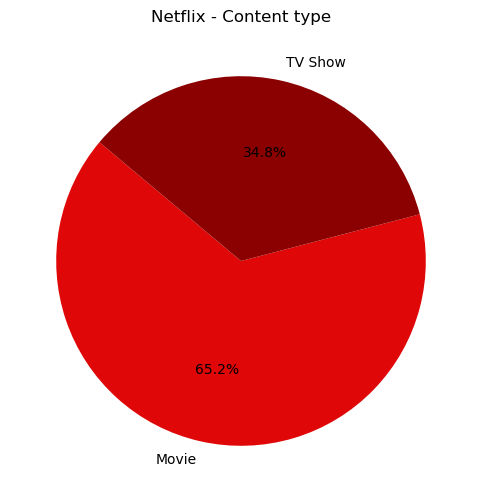

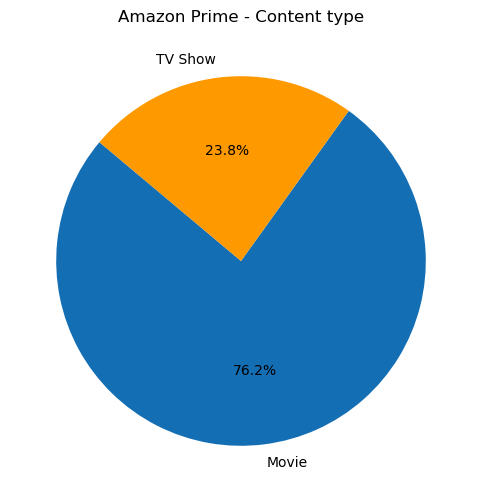

In [12]:
# Define a custom color palette for Netflix and Amazon Prime

netflix_palette = ['#df0707', '#8B0000']  
amazon_prime_palette = ['#146eb4', '#ff9900']  

# Filter data to exclude 'not found' in 'type' column
df_filtered = df[df['type'] != 'not found']

# Calculate the sum of the rates per platform
type_sum_by_platform = df_filtered.groupby('platform')['type'].value_counts().unstack(fill_value=0)

# Netflix
plt.figure(figsize=(8, 6))
plt.pie(type_sum_by_platform.loc['Netflix'], labels=type_sum_by_platform.columns, autopct='%1.1f%%', startangle=140, colors=netflix_palette)
plt.title('Netflix - Content type')
plt.show()

# Amazon Prime
plt.figure(figsize=(8, 6))
plt.pie(type_sum_by_platform.loc['Amazon Prime'], labels=type_sum_by_platform.columns, autopct='%1.1f%%', startangle=140, colors=amazon_prime_palette)
plt.title('Amazon Prime - Content type')
plt.show()

In [13]:
plt.savefig('netflixtype.png')
plt.savefig('amazontype.png')

<Figure size 640x480 with 0 Axes>

### `What genre produce more in movies?`

In [14]:
# Filter the original DataFrame by the category “movies”.

movies_df = df[df['type'] == 'Movie'].copy()

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8707 entries, ('Netflix', 0) to ('Amazon', 5805)
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   type                8707 non-null   object
 1   title               8707 non-null   object
 2   director            8707 non-null   object
 3   cast                8707 non-null   object
 4   country             8707 non-null   object
 5   release year        8707 non-null   int64 
 6   platform            8707 non-null   object
 7   animation           8707 non-null   int64 
 8   children & family   8707 non-null   int64 
 9   entertainment       8707 non-null   int64 
 10  documentary         8707 non-null   int64 
 11  thrillers           8707 non-null   int64 
 12  music & musicals    8707 non-null   int64 
 13  romance             8707 non-null   int64 
 14  comedy              8707 non-null   int64 
 15  drama               8707 non-null   int64 
 16 

In [15]:
# List of gender column names
genres = ['animation', 'children & family', 'entertainment', 'documentary', 'thrillers', 'music & musicals', 'romance', 'comedy', 'drama', 'horror', 'sci-fi & fantasy', 'action & adventure']

# Calculate the sum of 1s in each gender column
genres_sum = movies_df[genres].sum()
genres_sum

animation              243
children & family      633
entertainment          246
documentary           1167
thrillers              159
music & musicals        42
romance                 72
comedy                1422
drama                 2139
horror                 559
sci-fi & fantasy        59
action & adventure    1271
dtype: int64

In [16]:
movies_pt = movies_df.groupby('platform')[genres].sum().transpose() # Make new df so is easy to make de barplot. 
movies_pt

platform,Amazon Prime,Netflix
animation,224,19
children & family,230,403
entertainment,246,0
documentary,430,737
thrillers,113,46
music & musicals,27,15
romance,69,3
comedy,643,779
drama,980,1159
horror,348,211


<Figure size 2000x1600 with 0 Axes>

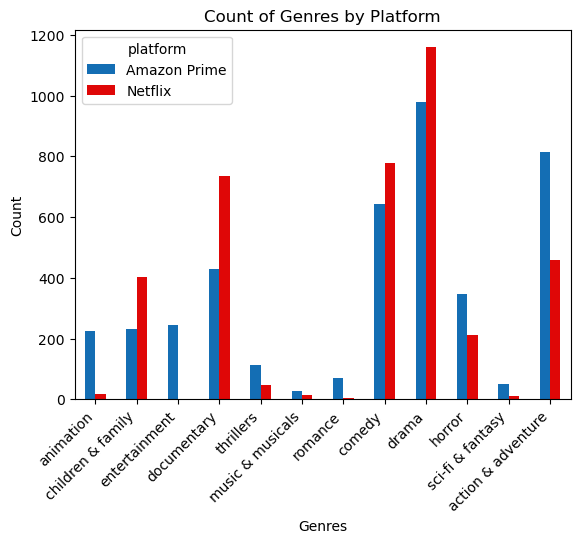

<Figure size 640x480 with 0 Axes>

In [17]:
# Make a bar plot. 

plt.figure(figsize=(20, 16))
ax = movies_pt.plot.bar(color={'Netflix': '#df0707', 'Amazon Prime': '#146eb4'})
plt.title('Count of Genres by Platform')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig('genres.png')

### `With which directors do they usually work the most?`

In [42]:
# Change name of the number because it's not a director.
movies_df = movies_df.replace(to_replace=["1"], value='not found')
movies_df = movies_df.replace(to_replace=["Moonbug Entertainment"], value='not found')
movies_df = movies_df.replace(to_replace=["Mark Knight"], value='not found')
movies_df = movies_df.replace(to_replace=["Pinkfong"], value='not found')
movies_df = movies_df.replace(to_replace=["Ryan Polito"], value='not found')
movies_df = movies_df.replace(to_replace=["Aaron Michael"], value='not found')
movies_df = movies_df.replace(to_replace=["Mora TV"], value='not found')
movies_df = movies_df.replace(to_replace=["Bruce Legg"], value='not found')


In [43]:
# Filter the top 10 directors.
directors_top = movies_df[movies_df['director'] != 'not found']['director'].value_counts().head(10)

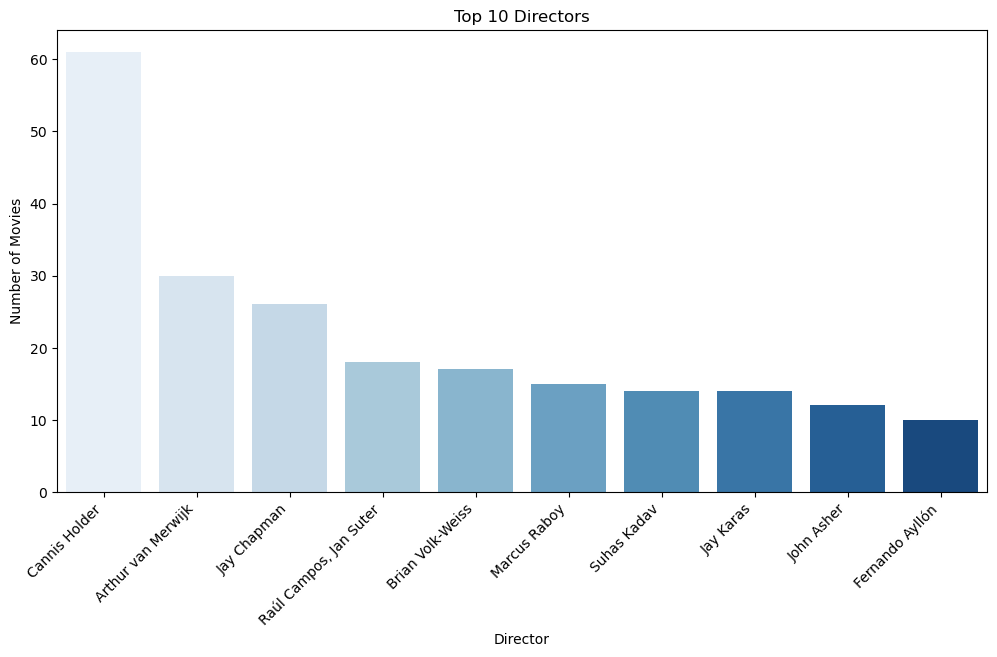

In [44]:
# Create a bar chart with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=directors_top.index, y=directors_top.values, palette='Blues')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
plt.savefig('directors.png')

<Figure size 640x480 with 0 Axes>

### `In which country more movies are made?`

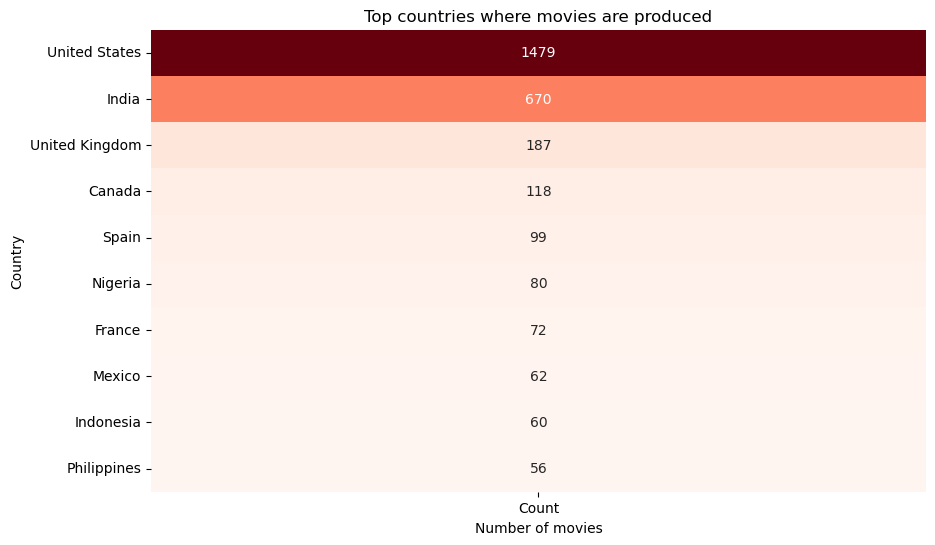

In [22]:
# Filtrar los 10 países con más producción
top_10_countries = movies_df[movies_df['country'] != 'not found']['country'].value_counts().head(10)

# Crear un mapa de calor con los países y su cantidad de producciones
plt.figure(figsize=(10, 6))
heatmap_data = pd.DataFrame({'Count': top_10_countries.values}, index=top_10_countries.index)
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt='g', cbar=False)
plt.title('Top countries where movies are produced')
plt.xlabel('Number of movies')
plt.ylabel('Country')
plt.show()


In [23]:
plt.savefig('countries.png')

<Figure size 640x480 with 0 Axes>